# Group Project Report

**Introduction**

* provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
    * At least 2 citations of literature relevant
* clearly state the question you tried to answer with your project
* identify and describe the dataset that was used to answer the question
    * "Player Stats for Top 500 Players"

The data set proposed describes the tennis players' statisitcs which were collected by Ultimate Tennis Statisitcs (https://www.ultimatetennisstatistics.com/). 

Tennis, a widely popular individual sport with a rich history dating back to the 19th century, engages millions of players globally. Its period of most rapid growth as both a participant and a spectator sport began in the late 1960s. Performance in this sport is assessed through global rankings, primarily administered by the Association of Tennis Professionals (ATP) for men and the Women's Tennis Association (WTA) for women. The impact of age on player rankings, known as the Relative Age Effect (RAE), has become a subject of extensive studies.

Studies such as "The relative age effect in top 100 elite female tennis players in 2007–2016" by Zháněl J, Válek T, Bozděch M, Agricola A (2022) revealed that over half of the top 100 players were born in the first half of the year. Another research piece, "Biological age vs. chronological age: the impact on the development of the young tennis athlete," emphasized that the relative age effect is one of many variables directly influencing a player's tennis level. Consequently, a player's age significantly affects performance and ranking.

Considering the direct correlation between age and a player's ranking, impacting health, strength, and mentality, we propose the following question: Can we predict a player's ranking based on their age?

To address this inquiry, we will analyze the "Player Stats for Top 500 Players" data set. This comprehensive data set encompasses various aspects of the top 500 tennis players globally, including names, ages, countries, and more. In this project, we aim to leverage the players' ages and their corresponding rankings in the data collection to predict the ranking of another player, given their age, as well as raising questions about the length of players' careers in the future and how age affects changes in rankings over time.

**Methods & Results**

In [6]:
set.seed(2000)
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

First, we will read our data directly from web with the exact link to source.

In [7]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
download.file("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS", destfile = "data/player_stats.csv")
player_stats <- read_csv(url)

player_stats

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,28 (18-11-1991),United States,Right-handed,Wikipedia,307 (131),213 (31-10-2016),Sekou Bangoura,Two-handed,"$278,709",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,21 (12-05-1998),"Taiwan, Province of China",Right-handed,Wikipedia,232 (205),229 (04-11-2019),Tung Lin Wu,Two-handed,"$59,123",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,25 (29-07-1994),Uzbekistan,Right-handed,Wikipedia,417 (81),253 (17-07-2017),Sanjar Fayziev,Two-handed,"$122,734",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


We can see that for multiple columns, there are more than one variable in one cell. For example, player age and birthday, current rank and points. There are also missing values for several cells we are interested in. After careful inspection, we concluded that this dataset is from four years ago (Nadal is 37 this year, not 33). We see that John Millman's `age` is not available, since he is 34 years old this year, we can replace the `NA` in his age with his age four years ago, which is 30. There are also multiple `NA` in the `current_rank` column, so we can also fill those in using the website where the dataset was from to wrangle our data.

In [8]:
player_stats_complete <- player_stats |>
    separate("Age", into = c("age", "birthday"), sep = "\\(")|>
    separate("Current Rank", into = c("current_rank", "points"), sep ="\\(") |>
    rename(name = Name)|>
    select(name, age, current_rank)|>
    mutate(current_rank = as.numeric(current_rank))|>
    arrange(current_rank)|>
    mutate(age = ifelse(is.na(age), 30, age))|>
    mutate(current_rank = ifelse(is.na(current_rank),
                             case_when(
                                 name == "Scott Griekspoor" ~ 472,
                                 name == "Brandon Holt" ~ 499,
                                 name == "Evan Song" ~ 314,
                                 name == "John Millman" ~ 48,
                                 name == "Sebastian Fanselow" ~ 494),
                             current_rank))|>
    arrange(current_rank)|>
    as_tibble()

player_stats_complete

name,age,current_rank
<chr>,<chr>,<dbl>
Rafael Nadal,33,1
Novak Djokovic,32,2
Roger Federer,38,3
Daniil Medvedev,23,4
Dominic Thiem,26,5
Stefanos Tsitsipas,21,6
Alexander Zverev,22,7
Matteo Berrettini,23,8
Roberto Bautista Agut,31,9


Table 1: 2019's top 500 tennis players age and ranking (complete).

We can plot this to see what the relationship between player's age and current ranking looks like.

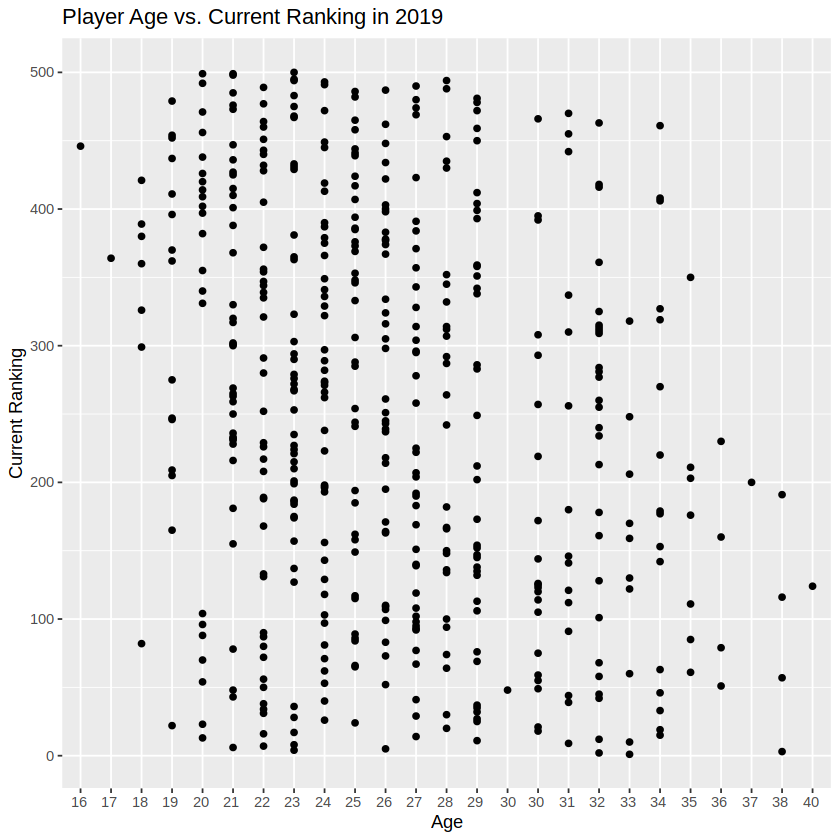

In [9]:
player_stats_plot <- player_stats_complete |>
    ggplot(aes(x = age, y = current_rank))+
    geom_point()+
    labs(x = "Age", y = "Current Ranking")+
    ggtitle("Player Age vs. Current Ranking in 2019")

player_stats_plot

Figure 1: Relationship between player's age and 2019 ranking.

Based on this plot alone, it is difficult to determine whether the relationship between player's age and ranking is positive or negative. To get a better sense of what teh relationship looks like, we can also look at the average ranking of each age in the top 500 players.

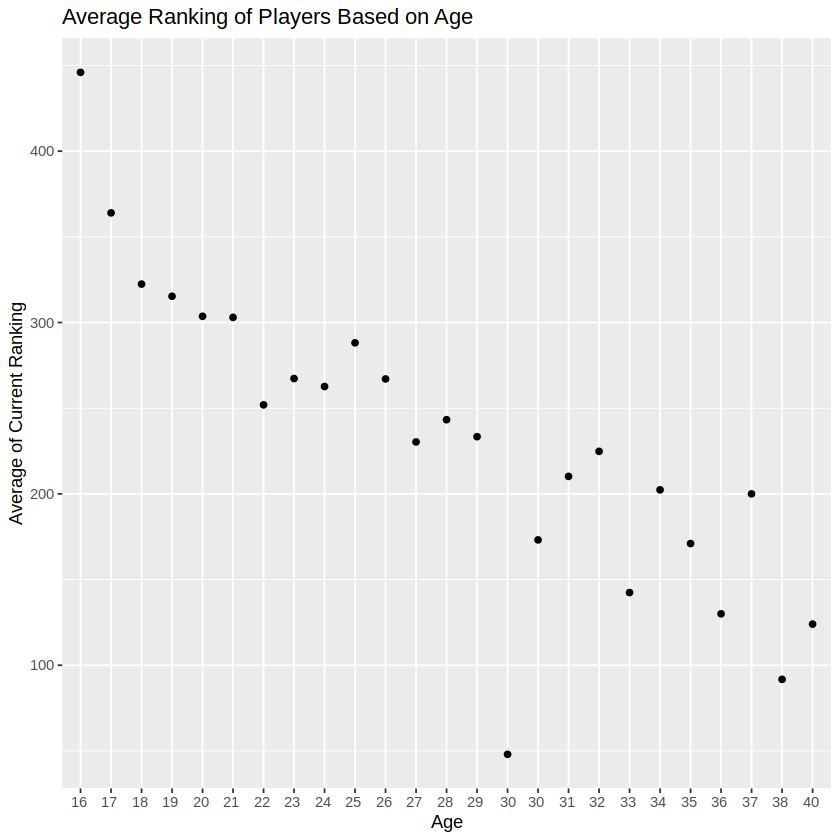

In [10]:
avg_current_rank <- player_stats_complete|>
    group_by(age)|>
    summarize(current_rank = mean(current_rank))

avg_rank_plot <- avg_current_rank|>
    ggplot(aes(x = age, y = current_rank))+
    geom_point()+
    labs(x = "Age", y = "Average of Current Ranking")+
    ggtitle("Average Ranking of Players Based on Age")

avg_rank_plot

Figure 2: Relationship between player's age and average 2019 ranking.

With this plot, we know that we are expecting to see a negative relationship between player's age and their current ranking: as players get older, they will be higher up in the rankings. <br>
With a clean and complete data set, we can now split our data into training and testing sets. For our training set, we will be using 75% of our original 
`player_stats_complete` data.

In [11]:
player_stats_split <- initial_split(player_stats_complete, prop = 0.75, strata = current_rank)
player_stats_train <- training(player_stats_split)
player_stats_test <- testing(player_stats_split) 

Now that we have our training data, we can create the model specification and recipe, and fit our linear regression model.

In [12]:
lm_spec <- linear_reg() |>
    set_engine("lm")|>
    set_mode("regression")

ps_recipe <- recipe(current_rank ~ age, data = player_stats_train)

ps_fit <- workflow() |>
    add_recipe(ps_recipe) |>
    add_model(lm_spec) |>
    fit(data = player_stats_train)

ps_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)       age18        age19        age20        age21        age22   
      446.0       -104.8       -144.8       -136.0       -133.1       -214.3  
     age23        age24        age25        age26        age27        age28   
     -181.7       -194.3       -161.2       -175.7       -205.1       -197.0  
     age29        age30        age31        age32        age33        age34   
     -188.9       -271.9       -307.1       -206.4       -319.3       -235.4  
     age35        age36        age37        age38        age40   
     -277.3       -316.0       -246.0       -354.3       -322.0  


Aside from the intercept, all variables (`age`) have a negative relationship with the `current_rank`. We can interpret this as the player's age increase, the numerical value of their ranking decreases, meaning they will be higher up in the rankings. This is consistent with what we expected when we plotted the average ranking of players based on age. <br>
With the intercepts, we can now come up with an equation for the linear model: <br>
$current\: rank = 446.0 - 165.8*age\:18 - 132.7*age\: 19 - 145.5*age\: 20 - 154.9*age\: 21 - 190.9*age\: 22 - 196.6*age\: 23 - 174.2*age\: 24 - 117.7 *age\: 25 - 172.1*age\: 26 - 216.3*age\: 27 - 205.2*age\: 28 - 197.2*age\: 29 - 398.0*age\: 30 - 266.6*age\: 30 - 248.6*age\: 31 - 231.2*age\: 32 - 310.2*age\: 33 - 290.9*age\: 34 - 275.8*age\:35 - 289.7*age\: 36 - 246.0*age\: 37 - 387.3*age\: 38$

We can visualize the model predictions on the training data with a scatterplot.

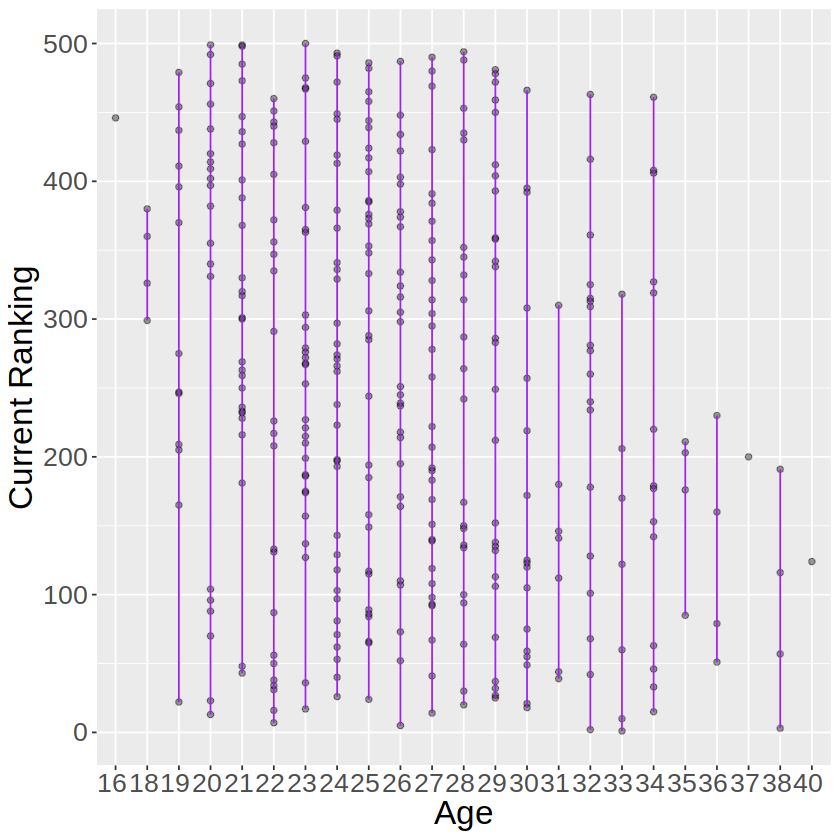

In [18]:
player_stats_preds <- ps_fit |>
  predict(player_stats_train) |>
  bind_cols(player_stats_train)

lm_predictions <- player_stats_preds |>
    ggplot(aes(x = age, y = current_rank)) +
    geom_point(alpha = 0.4) +
    geom_line(
        mapping = aes(x = age, y = current_rank),
        color = "purple") +
    labs(x = "Age", y = "Current Ranking")+
    theme(text = element_text(size = 20))
lm_predictions

Figure 3: Model predictions as a straight line overlaid on the training data.

We can now calculate the *RMSE* as a single numeric value to assess goodness of fit on `ps_fit`.

In [14]:
lm_rmse <- ps_fit |>
    predict(player_stats_train) |>
    bind_cols(player_stats_train) |>
    metrics(truth = current_rank, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate)|>
    as.numeric()
lm_rmse

[1] 136.1131

We can also evaluate how well our model is doing by calculating the *RMSPE* as a single numeric value using the test data.

In [22]:
lm_rmspe <- ps_fit|>
    predict(player_stats_test)|>
    bind_cols(player_stats_test)|>
    metrics(truth = current_rank, estimate = .pred)|>
    filter(.metric == "rmse")|>
    select(.estimate)|>
    as.numeric()
lm_rmspe

[1] 144.017

Once again, we can visualize the model predictions with a scatterplot, this time on the testing data instead.

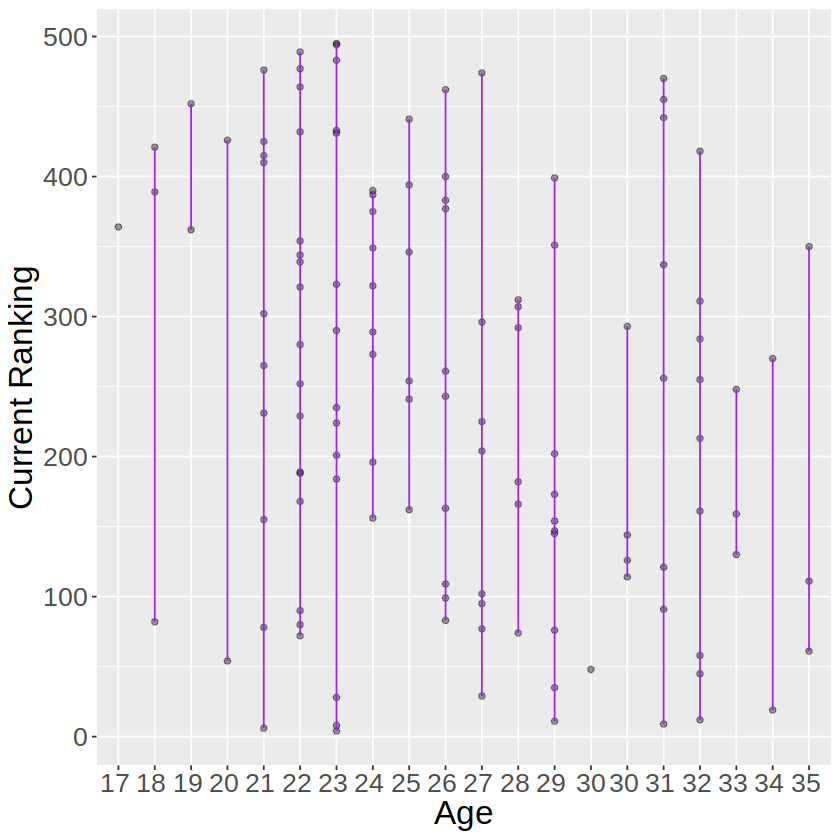

In [20]:
test_preds <- ps_fit |>
  predict(player_stats_test) |>
  bind_cols(player_stats_test)

lm_predictions_test <- test_preds |>
    ggplot(aes(x = age, y = current_rank)) +
    geom_point(alpha = 0.4) +
    geom_line(
        mapping = aes(x = age, y = current_rank),
        color = "purple") +
    labs(x = "Age", y = "Current Ranking")+
    theme(text = element_text(size = 20))
lm_predictions_test

Figure 4: Model predictions as a straight line overlaid on the test data.

**Discussion**

* summarize what you found
    * based on equation: negative relationship
    * rmse = 136.113089414802
    * rmspe = 144.017044619744
* discuss whether this is what you expected to find?
    * expected negative relationship
    * lots of fluctuations in ranking (player experience, talent)
* discuss what impact could such findings have?
* discuss what future questions could this lead to?

After analyzing the data of the top 500 Tennis players, a negative relationship was discovered between the age of a player and their subsequent ranking in the top 500. In short, as a player gets older, they tend to rank higher, which was expected. In terms of the RMSE and RMSPE, for this model the calculated RMSE was 136.113089414802, and the calculated RMSPE was 144.017044619744. Considering that a perfect RMSE and RMSPE would be zero, this is leaves something to be desired. However, there is a lot to be considered when assessing a player's ranking, such as current health, athletic ability or talent, experience levels, and a plethora of other factors. Based on the data on hand, the factors were limited to just age, meaning that our model could not account for these other fluctuations. 

**References**

* At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
* Make sure to cite the source of your data as well.